---
---

# **1 - Simple Linear Regression (SLR)**

## **Simple Linear Regression Setup**

In this very simple example, we'll explore how to create a very simple fit line, the classic case of `y=mx+b`. We'll go carefully through each step, so you can see what type of question a simple fit line can answer. Keep in mind, this case is very simplified and is not the approach we'll take later on, its just here to get you thinking about linear regression in perhaps the same way [Galton](https://en.wikipedia.org/wiki/Francis_Galton) did.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Sample Data**

This sample data is from ISLR book. It displays sales (in `thousands of units`) for a particular product as a function of `advertising budgets` (in `thousands of dollars`) for TV, radio, and newspaper media.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Is there a relationship between *total* advertising spend and *sales*?**

In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


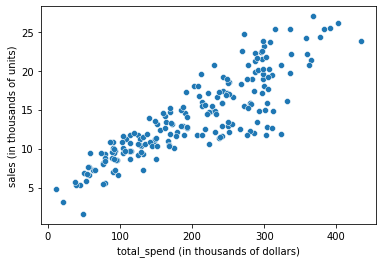

In [5]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.xlabel('total_spend (in thousands of dollars)')
plt.ylabel('sales (in thousands of units)')
plt.show()

---

### **Ordinary Least Squares Line**

Ordinary Least Squares works by minimizing the sum of the squares of the differences between the observed dependent variable (value of the variable being observed) in given dataset and those predicted by the linear function

Full formulas available on Wikipedia: https://en.wikipedia.org/wiki/Linear_regression ,as well as in ISLR reading.

**Understanding what a line of best fit answers.**
If someone was to spend a total of $200 , what would the expected sales be? We have simplified this quite a bit by combining all the features into "total spend", but we will come back to individual features later on. For now, let's focus on understanding what a linear regression line can help answer.

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

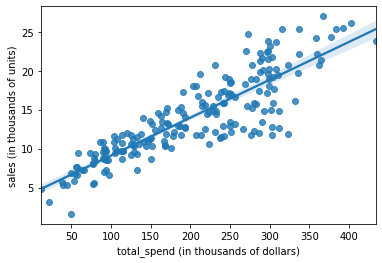

In [6]:
# Basically, we want to figure out how to create this line
sns.regplot(x='total_spend',y='sales',data=df)
plt.xlabel('total_spend (in thousands of dollars)')
plt.ylabel('sales (in thousands of units)')
plt.show()

Let's go ahead and start solving: $$y=mx+b$$

Simply solve for m (`gradient/slope`) and b (`intercept` with y-axis/titik potong persamaan garis saat `x=0`). There is only room for one possible feature x. We will need tools like gradient descent to scale this to multiple features.

Remember, we are solving in a generalized form:

$$ \hat{y} = \beta_0 + \beta_1X$$

Capitalized to signal that we are dealing with a matrix of values, we have a known matrix of `labels` (sales numbers) Y and a known matrix of `total_spend` (X). We are going to solve for the `beta coefficients`, which as we expand to more than just a single feature, will be important to build an understanding of what features have the most predictive power. We use `y hat` to indicate that `y hat` is a `prediction or estimation`, `y` would be a `true label/known value`.

We can use NumPy for this (if you really wanted to, you could solve this by [hand](https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf))

In [7]:
X = df['total_spend']
y = df['sales']

In [8]:
#help(np.polyfit)

In [9]:
# Returns highest order coef first!
# y = mx + b
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [10]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [11]:
# y = mX + b
predicted_sales =  0.04868788*potential_spend + 4.24302822

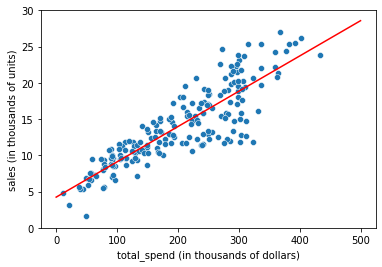

In [12]:
# Plot the actual data from dataset
sns.scatterplot(x='total_spend',y='sales',data=df)

# Plot the regression line
plt.plot(potential_spend,predicted_sales,color='red')
plt.xlabel('total_spend (in thousands of dollars)')
plt.ylabel('sales (in thousands of units)')
plt.ylim(0,30)
plt.show()

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

In [13]:
spend = 200
predicted_sales = 0.04868788*spend + 4.24302822

In [14]:
predicted_sales

13.98060422

**TEST POLYNOMIAL REGRESSION**

Notice we fit to order=1 , essentially a straight line, we can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

In [15]:
# y = B3*x**3 + B2*x**2 + B1*x +B0
# Coba gunakan polynom orde 3 dan cek beta coefficient (B)
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [16]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [17]:
predicted_sales = 3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

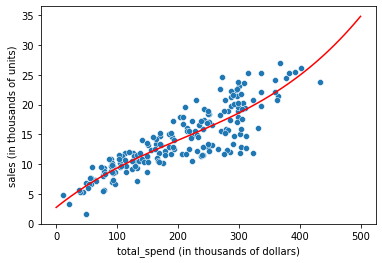

In [18]:
# Plot actual data
sns.scatterplot(x='total_spend',y='sales',data=df)

# Plot regression line order 3
plt.plot(potential_spend,predicted_sales,color='red')
plt.xlabel('total_spend (in thousands of dollars)')
plt.ylabel('sales (in thousands of units)')
plt.show()

**Is this better than our straight line fit? What are good ways of measuring this?**

As we expand to more than a single feature, an analytical solution quickly become unscalable.

Instead we shift focus on `minimizing` a cost function with `gradient descent`

---
---

# **2 - Multiple Linear Regression (MLR)**

## **A. Multiple Linear Regression Setup**

We saw how to create a very simple best fit line, but now let's greatly expand our toolkit to start thinking about the considerations of `overfitting`, `underfitting`, `model evaluation`, as well as `multiple features`!

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Sample Data**

This sample data is from ISLR book. It displays sales (in `thousands of units`) for a particular product as a function of `advertising budgets` (in `thousands of dollars`) for TV, radio, and newspaper media.

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/Advertising.csv')

In [21]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


---

### **a. Multiple Features (N-Dimensional)**

Previously, we explored **Is there a relationship between *total* advertising spend and *sales*?** as well as predicting the total sales for some value of total spend. Now we want to expand this to `What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?`

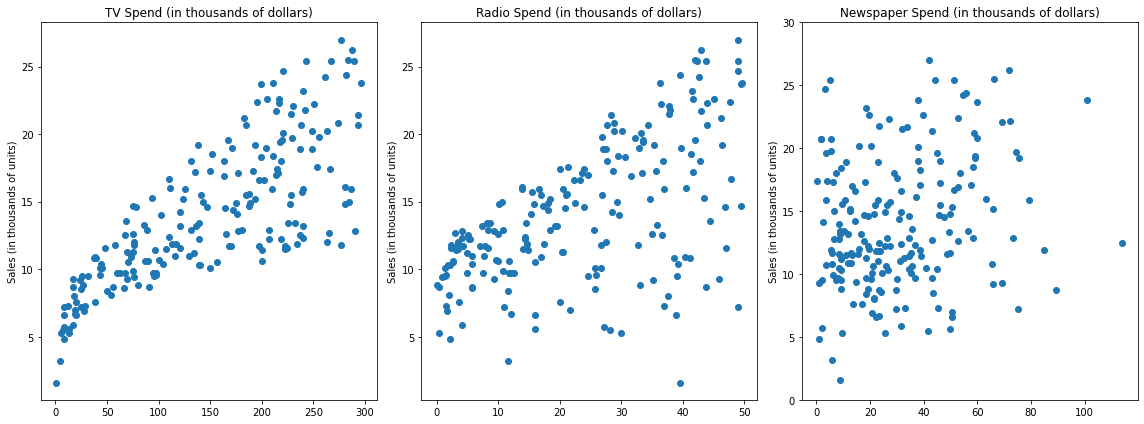

In [22]:
# Relationship each features to sales
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'],'o')
axes[0].set_ylabel("Sales (in thousands of units)")
axes[0].set_title("TV Spend (in thousands of dollars)")

axes[1].plot(df['radio'], df['sales'],'o')
axes[1].set_title("Radio Spend (in thousands of dollars)")
axes[1].set_ylabel("Sales (in thousands of units)")

axes[2].plot(df['newspaper'], df['sales'],'o')
axes[2].set_title("Newspaper Spend (in thousands of dollars)");
axes[2].set_ylabel("Sales (in thousands of units)")
plt.ylim(0,30)
plt.tight_layout()
plt.show()

**OR USE THIS**

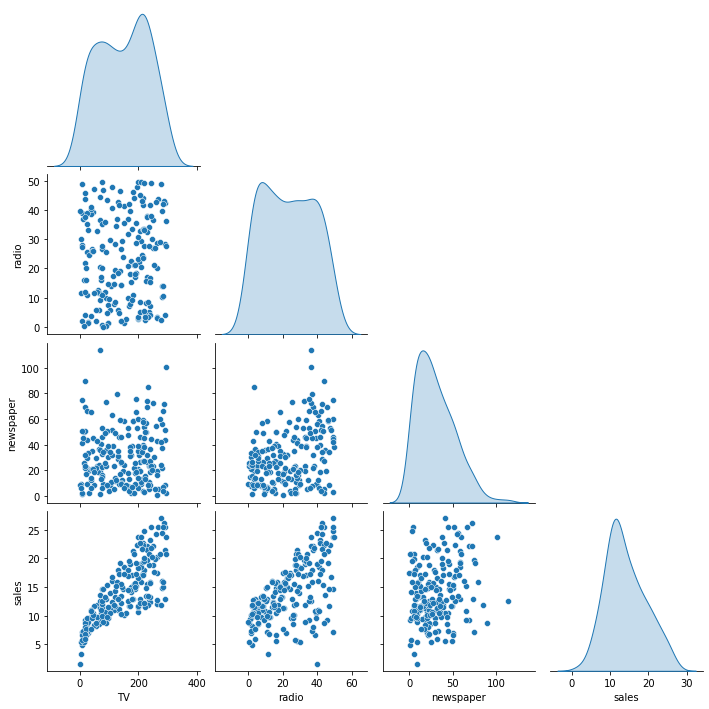

In [23]:
# Relationships between features
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

---

### **b. Train | Test Split**

Train | Test Split data is to avoid the ML memorize the data set (avoid overfitting) and to fairly evaluate our model




We will work a lot with the scitkit learn library, so get comfortable with its model estimator syntax, as well as exploring its incredibly useful documentation!


In [24]:
X = np.array(df.drop('sales',axis=1))
y = np.array(df['sales'])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
X_train[0:5]

array([[193.2,  18.4,  65.7],
       [287.6,  43. ,  71.8],
       [ 80.2,   0. ,   9.2],
       [182.6,  46.2,  58.7],
       [222.4,   4.3,  49.8]])

In [28]:
y_train[0:5]

array([15.2, 26.2,  8.8, 21.2, 11.7])

In [29]:
X_test[0:5]

array([[ 74.7,  49.4,  45.7],
       [255.4,  26.9,   5.5],
       [112.9,  17.4,  38.6],
       [109.8,  47.8,  51.4],
       [ 31.5,  24.6,   2.2]])

In [30]:
y_test[0:5]

array([14.7, 19.8, 11.9, 16.7,  9.5])

---

### **c. Creating a Model (Estimator)**

##### **Import a model class from a model family**

In [31]:
from sklearn.linear_model import LinearRegression

---

#### **Create an instance of the model with parameters**

In [32]:
#help(LinearRegression)

In [33]:
model = LinearRegression()

---

#### **Fit/Train the Model on the training data**

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [34]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

---

## **B. Understanding and utilizing the Model**

### **a. Performance Evaluation of Regression Theory**

#### **Metrics of Regression**

Make sure you've viewed the video on these metrics!
The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the `mean` of the `absolute value` of the `errors`:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the `mean` of the `squared errors`:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the `square root` of the `mean` of the `squared errors`:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error. But MAE wont punish larger errors
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. But MSE reports units of $y^2$, different units than $y$
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

---

#### **Residuals**



Revisiting Anscombe's Quartet: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

Often for Linear Regression it is a good idea to separately evaluate residual ($y - y$_hat) and not just calculate performance metrics

##### *Valid*

In [36]:
quartet = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/anscombes_quartet1.csv')

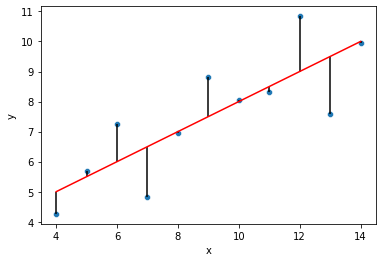

In [37]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet, x='x', y='pred_y', color='red')
plt.vlines(quartet['x'], quartet['y'], quartet['pred_y'])
plt.show()

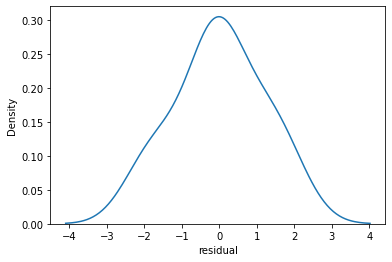

In [38]:
sns.kdeplot(quartet['residual'])
plt.show()

**- Residual plot shows residual error vs true y value:**

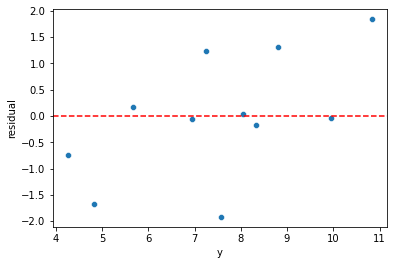

In [39]:
sns.scatterplot(data=quartet, x='y', y='residual')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

The residual errors should be close to a normal distribution

There should be no clear line or curve and the blue point close to the red dash line

---

##### *Non-valid*

In [40]:
quartet = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/anscombes_quartet2.csv')

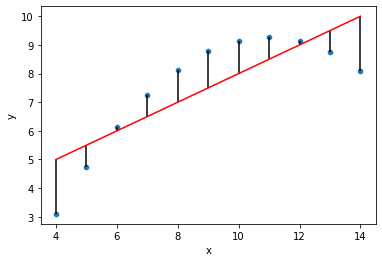

In [41]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'], quartet['y'], quartet['pred_y'])
plt.show()

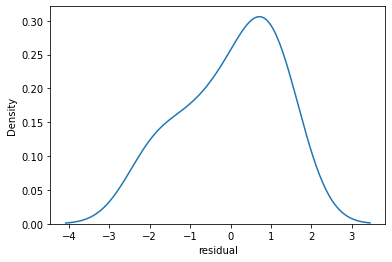

In [42]:
sns.kdeplot(quartet['residual'])
plt.show()

**- Residual plot shows residual error vs true y value:**

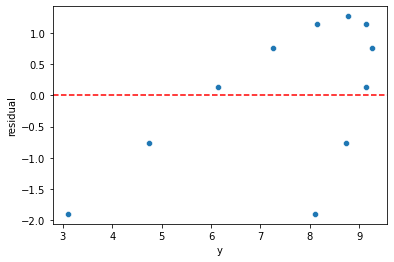

In [43]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Based on image above, the residual plot showing a clear pattern, indicating Linear Regression not valid

---

In [44]:
quartet = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/anscombes_quartet4.csv')

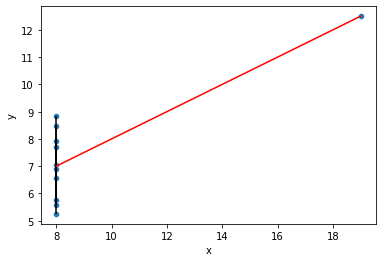

In [45]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet, x='x', y='y')
sns.lineplot(data=quartet, x='x', y='pred_y', color='red')
plt.vlines(quartet['x'], quartet['y'], quartet['pred_y'])
plt.show()

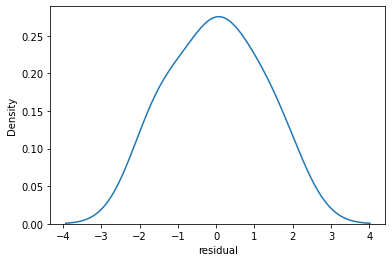

In [46]:
sns.kdeplot(quartet['residual'])
plt.show()

**- Residual plot shows residual error vs true y value:**

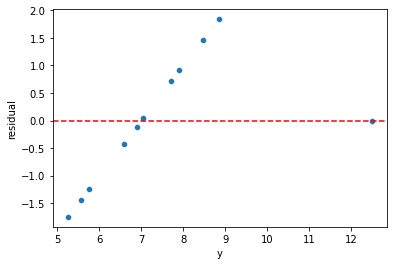

In [47]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Based on image above, the residual plot showing a clear pattern, indicating Linear Regression not valid

---

### **b. Calculate Performance Metrics on Test Set**

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [48]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [49]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
MAE = mean_absolute_error(y_test,test_predictions)
MAE

1.2137457736144805

In [52]:
MSE = mean_squared_error(y_test,test_predictions)
MSE

2.2987166978863787

In [53]:
RMSE = np.sqrt(MSE)
RMSE

1.5161519375993882

**Compare the errors with actual data**

In [54]:
df['sales'].mean()

14.022500000000003

In [55]:
err = RMSE/df['sales'].mean() *100
err

10.812279818858176

---

### **c. Residuals on Test Set**

It's also `important` to plot out `residuals` and check for `normal distribution`, this `helps us understand` if Linear Regression was a `valid` model choice.

In [56]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
y_test_predictions = model.predict(X_test)

In [57]:
# If our model was perfect, these would all be zeros
y_test_res = y_test - y_test_predictions
y_test_res[0:5]

array([-1.04131332,  0.18937432,  0.45111065, -0.30819787,  0.32714324])

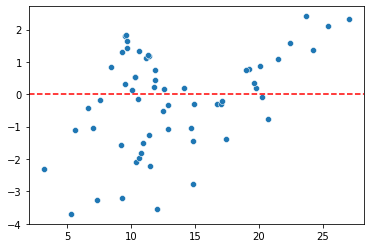

In [58]:
sns.scatterplot(x=y_test, y=y_test_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Based on above image, the residual plot showing a random pattern, indicating Linear Regression is valid

---

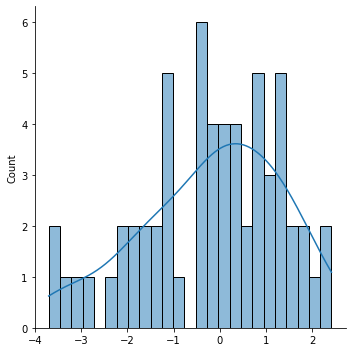

In [59]:
sns.displot(y_test_res, bins=25, kde=True)
plt.show()

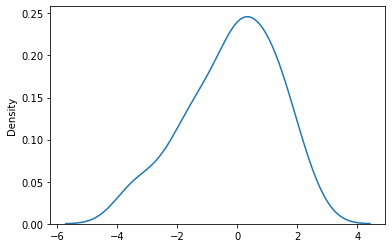

In [60]:
sns.kdeplot(y_test_res)
plt.show()

Based on image above, the residual error close to normal distribution

---

##### **Probability Plotting (Optional)**

Still unsure if normality is a reasonable approximation? We can check against the [normal probability plot.](https://en.wikipedia.org/wiki/Normal_probability_plot) :

In [61]:
import scipy as sp

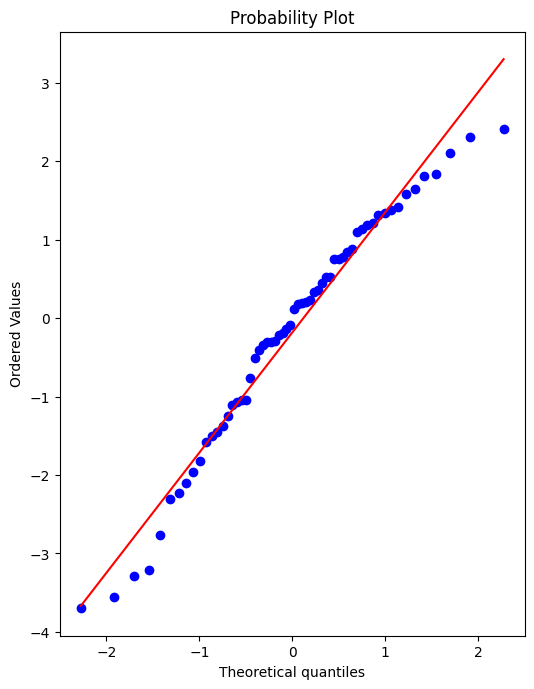

In [62]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(y_test_res,plot=ax)

Red line is the normal distribution and blue point is the data

---

## **C - Deployment, Predictions, and Model Attributes**

### **a. Re-Fit/Train Model on Full Data**

If we're `satisfied` with the performance on the test data, before `deploying` our model to the real world, we `should retrain` on all our data. (If we were `not satisfied`, we could `update parameters` or `choose another model`).

In [63]:
final_model = LinearRegression()

In [64]:
final_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Note:**

**It may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.**

---

### **b. Final Model Plotting (Optional)**

Note, we can `only` do this since we `only` have `3 features`, for `any more` it becomes `unreasonable`.

In [65]:
y_hat = final_model.predict(X)

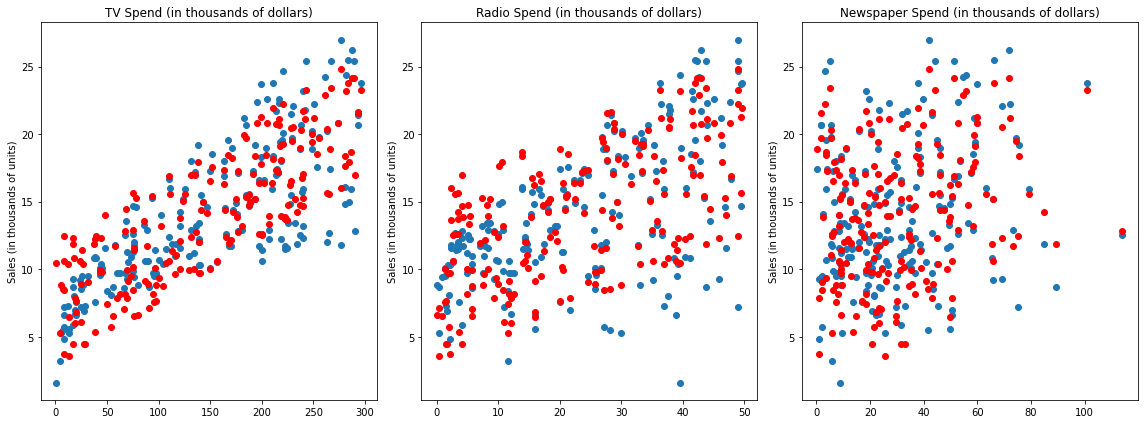

In [66]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'], df['sales'],'o')
axes[0].plot(df['TV'], y_hat,'o',color='red')
axes[0].set_ylabel("Sales (in thousands of units)")
axes[0].set_title("TV Spend (in thousands of dollars)")

axes[1].plot(df['radio'], df['sales'],'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_title("Radio Spend (in thousands of dollars)")
axes[1].set_ylabel("Sales (in thousands of units)")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red')
axes[2].set_title("Newspaper Spend (in thousands of dollars)");
axes[2].set_ylabel("Sales (in thousands of units)")
plt.tight_layout()
plt.show()

### **c. Residuals**

Should be normally distributed.

In [67]:
y_hat = final_model.predict(X)
y_residuals = y - y_hat

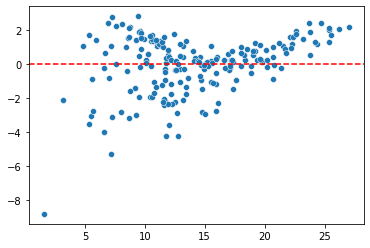

In [68]:
sns.scatterplot(x=y, y=y_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

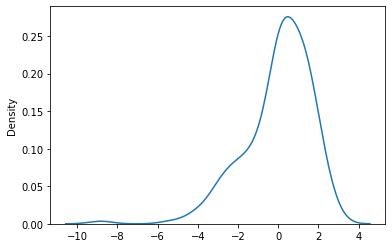

In [69]:
sns.kdeplot(y_residuals)
plt.show()

---

### **d. Coefficients**

In [70]:
# Return the slope/gradient (Bn) value of each features
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [71]:
coeff_df = pd.DataFrame(final_model.coef_, index=['TV', 'Radio', 'Newspaper'], columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


Interpreting the coefficients:

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case thousands of units . 
* This basically means that for every 1000 dollars spend on TV Ads, we could expect 45 more units sold.
----

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case thousands of units . 
* This basically means that for every 1000 dollars spend on Radio Ads, we could expect 188 more units sold.
----

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case thousands of units . 
* This basically means that for every 1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---


**Note! In this case `all our units were the same` for `each feature` (1 unit = $1000 of ad spend). But in `other datasets`, `units may not be the same`, such as a housing dataset could try to predict a sale price with both a feature for `number of bedrooms` and a feature of `total area` like square footage. In `this case` it would make more sense to *normalize* the data, in order to clearly compare features and results.**

In [72]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


---

### **e. Prediction on New Data**

Recall , X_test data set looks *exactly* the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [73]:
campaign = [[149,22,12]]

In [74]:
# Predict Sales (in thousands of units)
final_model.predict(campaign)

array([13.893032])

**How accurate is this prediction? No real way to know! We only know truly know our model's performance on the test data, that is why we had to be satisfied by it first, before training our full model**

Prediction of new data will be more or less around `existing data` with MAE=1.21 and RMSE=1.52 (as long the new data within exisiting data).

---

### **f. Model Persistence (Saving and Loading a Model)**

In [75]:
from joblib import dump, load

In [76]:
dump(final_model, '/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/sales_model.joblib') 

['/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/sales_model.joblib']

In [77]:
loaded_model = load('/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/sales_model.joblib')

In [78]:
loaded_model.predict(campaign)

array([13.893032])

let's expand on the linear regresion model by taking a further look a regularization!

---
---

# **3 - Bias Variance Trade-Off**

Overfitting:
  * The model fits too much to the noise from data.
  * This often results in low error on training sets but high error on test/validation sets
  * Overfitting can be harder to detect
  * Low bias but high variance

Underfitting:
  * Model does not capture the underlying trend of the data and does not fit the data well enough
  * Underfitting is often a result of an excessively simple model
  * Underfitting can lead to poor performance in both training and testing data sets.
  * Low variance but high bias and is generalizing too much

 

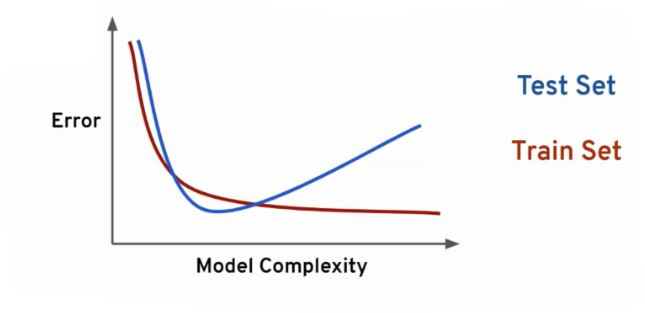

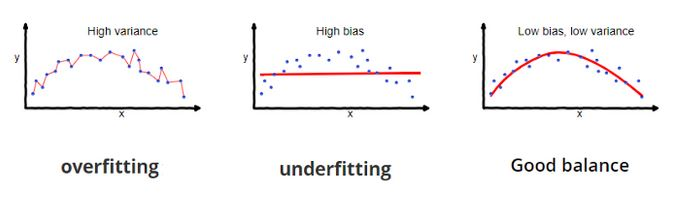

---
---

# **4 - Polynomial Regression**

There are two issues polynomial regression will address for us:

* Non-linear feature relationship to label
* Interaction terms between features

## **A. Polynomial Regression Setup**

We saw how to create a very simple best fit line, but now let's greatly expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features!

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had `one` x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create `more features` from the `original x feature` for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the `degree` of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have `multiple X features`, not just a `single` one as in the `formula above`, so in `reality`, the `PolynomialFeatures` will also take `interaction terms` into account for example, if an `input` sample is `two dimensional` and of the form `[a, b]`, the `degree-2 polynomial features` are `[1, a, b, a^2, ab, b^2]`. The value of 1 is a bias.**


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Sample Data**

This sample data is from ISLR book. It displays sales (in `thousands of units`) for a particular product as a function of `advertising budgets` (in `thousands of dollars`) for TV, radio, and newspaper media.

In [80]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/Advertising.csv')

In [81]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


---

### **a. Polynomial Conversion**

In [82]:
# Everything BUT the sales column
X = df.drop('sales',axis=1)
y = df['sales']

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
# Create degree/order converter
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False) # bias is not used

In [85]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
X_poly_features = polynomial_converter.fit_transform(X)

In [86]:
# Now we have more feature than original (9 features)
print(X_poly_features.shape)

# The features are X1, X2, X3, X1*X2, X1*X3, X2*X3, X1**2, X2**2, X3**3
print(X_poly_features[0])

(200, 9)
[2.301000e+02 3.780000e+01 6.920000e+01 5.294601e+04 8.697780e+03
 1.592292e+04 1.428840e+03 2.615760e+03 4.788640e+03]


In [87]:
# original 3 features (X1, X2, X3)
print(X.shape)
print(X.iloc[0])

(200, 3)
TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64


In [88]:
# Check X1, X2, X3
print(X_poly_features[0, 0:3])

[230.1  37.8  69.2]


In [89]:
# Check X1**2, X2**2, X3**2
print(X_poly_features[0, 0:3]**2)

[52946.01  1428.84  4788.64]


**The interaction terms (because of multi-features):** 

$$x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  }   x_2  \cdot x_3 $$

In [90]:
# check X1*X2
230.1*37.8

8697.779999999999

In [91]:
# check X1*X3
230.1*69.2

15922.92

In [92]:
# check X2*X3
37.8*69.2

2615.7599999999998

---

### **b. Train | Test Split**

Train | Test Split data is to avoid the ML memorize the data set (avoid overfitting) and to fairly evaluate our model

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X_poly_features, y, test_size=0.3, random_state=101)

---

### **c. Model for fitting on Polynomial Data**



#### **Create an instance of the model with parameters**

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
model = LinearRegression()

---

#### **Fit/Train the Model on the training data**

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [97]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
# y = B1*X1 + B2*X2 + B3*X3 + B4*X1**2 + B5*X1*X2 + B6*X1*X3 + B7*X2**2 + B8*X2*X3 + B9*X**3
# check beta coefficient (B) of 9 features
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

---

## **B. Evaluation on the Test Set**

### **a. Calculate Performance on Test Set**

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [99]:
y_test_predictions = model.predict(X_test)

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [101]:
MAE = mean_absolute_error(y_test, y_test_predictions)
MAE

0.4896798044803836

In [102]:
MSE = mean_squared_error(y_test, y_test_predictions)
MSE

0.4417505510403753

In [103]:
RMSE = np.sqrt(MSE)
RMSE

0.6646431757269274

In [104]:
df['sales'].mean()

14.022500000000003

### **b. Comparison with Simple Linear Regression**

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Multiple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

So in this dataset, polynomial has better performance.

---

## **C. Choosing a Model, Deployment, and Predictions**



### **a. Plot and Adjusting Parameters**

Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [105]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []

# TEST ERROR PER DEGREE
test_rmse_errors = []

# Check degree from 1 to 9
for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    X_poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(X_poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN THIS NEW POLY SET ON TRAIN DATA
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,y_test_pred))

    # Append errors to lists for plotting later
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [106]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292231,
 0.43393443569020695,
 0.3517083688399345,
 0.2509342962601729,
 0.20872723323990613,
 5.42157751435276,
 0.140867515824127,
 0.17118580360234556]

In [107]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757269274,
 0.5803286825215619,
 0.5077742637898888,
 2.5758141220971607,
 4.335318691649054,
 1379.1716104914929,
 4129.0608136161545,
 96107.72947631204]

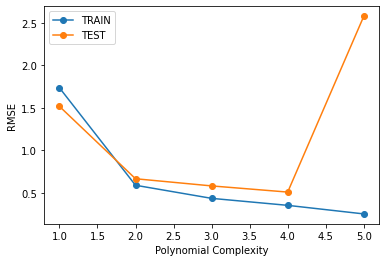

In [108]:
plt.plot(range(1,6), train_rmse_errors[:5], label='TRAIN', marker='o')
plt.plot(range(1,6), test_rmse_errors[:5], label='TEST', marker='o')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
plt.show()

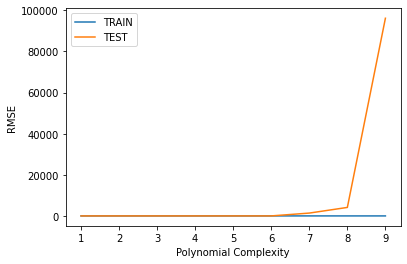

In [109]:
plt.plot(range(1,10), train_rmse_errors, label='TRAIN')
plt.plot(range(1,10), test_rmse_errors, label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
plt.show()

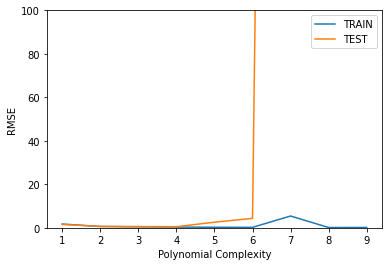

In [110]:
plt.plot(range(1,10), train_rmse_errors, label='TRAIN')
plt.plot(range(1,10), test_rmse_errors, label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()
plt.show()

Based on chart, it is better to choose degree=3 than degree=4, because it is more safer which degree=4 is close to blown out RMSE 

---

### **b. Finalizing Model Choice**

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [111]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
final_poly_features = final_poly_converter.fit_transform(X)

In [112]:
# Create instance of final_model
final_model = LinearRegression()

# Fit the line based on all X polynomial features and y
final_model.fit(final_poly_features, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

---

### **c. Saving Model and Converter**

In [113]:
from joblib import dump, load

In [114]:
dump(final_model, '/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/sales_poly_model.joblib') 

['/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/sales_poly_model.joblib']

In [115]:
dump(final_poly_converter,'/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/poly_converter.joblib')

['/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/poly_converter.joblib']

---

### **d. Prediction on New Data**

Recall that we will need to **convert** any incoming data to polynomial data, since that is what our model is trained on. We simply load up our saved converter object and only call **.transform()** on the new data, since we're not refitting to a new data set.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [116]:
loaded_poly = load('/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/poly_converter.joblib')
loaded_model = load('/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/sales_poly_model.joblib')

In [117]:
campaign = [[149,22,12]]

In [118]:
campaign_poly = loaded_poly.fit_transform(campaign)

In [119]:
campaign_poly.shape

(1, 19)

In [120]:
loaded_model.predict(campaign_poly)

array([14.64501014])

-----
---

# **5 - Regularization for Linear Regression**

Previously we created a new polynomial feature set and then applied our standard linear regression on it, but we can be smarter about model choice and utilize regularization.

Regularization attempts to `minimize the RSS` (residual sum of squares) *and* a `penalty factor`. This penalty factor will `penalize` models that have `coefficients` that are too `large`. Some `methods` of `regularization` will actually `cause` non useful `features` to have a `coefficient` of `zero`, in which `case` the model `does not` consider the `feature`.

Regularization seeks to solve a few common model issues by:
* Minimizing model complexity
* Penalizing the loss function
* Reduce model overfitting (increase bias to reduce model variance)

In general, we can think of `regularization` as a way to `reduce` model `overfitting` and `variance`.
* Requires some additional bias
* Requires a search for optimal penalty hyperparameter

Three main types of Regularization:
* LASSO Regression (L1)
* Ridge Regression (L2)
* Elastic Net (Combining L1 and L2)

These regularization methods do have a cost:
* Introduce an additional `hyperparameter` that needs to be `tuned`.
* A multiplier to the penalty to decide the `strength` of the penalty

## **A. Setup**

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/5_Linear_Regression/Advertising.csv')

In [123]:
X = df.drop('sales',axis=1)
y = df['sales']

---

### **a. Polynomial Conversion**

In [124]:
from sklearn.preprocessing import PolynomialFeatures

In [125]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [126]:
X_poly_features = polynomial_converter.fit_transform(X)
X_poly_features.shape

(200, 19)

---

### **b. Train | Test Split**

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_features, y, test_size=0.3, random_state=101)

In [129]:
X_train.shape

(140, 19)

In [130]:
X_test.shape

(60, 19)

---

### **c. Scaling the Data**

While our particular data set has all the values in the same order of magnitude ($1000s of dollars spent), typically that won't be the case on a dataset, and `since` the mathematics behind `regularized` models will sum `coefficients` together, its `important` to standardize the features.

Feature scaling benefits:
* Can lead to great `increases` in performance

* Absolutely `necessary` for some models (except tree-based model)

* Virtualy no "real" `downside` to scaling features

Feature scaling caveats:
* Must `always` scale new unseen data `before` feeding to model

* Effects direct `interpretability` of feature coefficients
    
    - `Eeasier` to compare coefficients to one another,     `harder` to relate back to original unscaled feature

Two main ways to scale features:
* Standardization

  Rescale data to have `mean (u)` of 0 and `standard deviation` of 1

  *Z-score normalization = new_X =* $(X - mean)/std$

* Normalization

  Rescales all data values to be `between 0 and 1`

  *new_X =* $(X-Xmin)/(Xmax-Xmin)$

Very important `consideration` for fit and transform:
* We `only` fit to `training` data

* Calculating `statistical` information `should` only come from `training` data ( `.fit()` method )

* `Dont` want to `assume` prior `knowledge` of the `test` set

Using `full data` set would cause `data leakage` (lead some `information` of the `test` set `leaking` into the `training` process upon `transform` conversion)

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
# help(StandardScaler)

In [133]:
scaler = StandardScaler()

In [134]:
# Fit only to training data (fit is to calculate statistical information)
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [135]:
scaled_X_train = scaler.transform(X_train)

In [136]:
scaled_X_train.mean()

7.47939721852737e-17

In [137]:
scaled_X_train.std()

1.0

In [138]:
scaled_X_test = scaler.transform(X_test)

---

## **B. Ridge Regression (L2)**

Ridge Regression is a regularization technique that works by helping reduce the potential for overfitting to the training data.

L2 regularization adds a penalty equal to the `square` of the sum of coefficients.
* All coefficients are shrunk by the same factor
* Does not necessarily eliminate coefficients

Recall the general formula for the regression line:

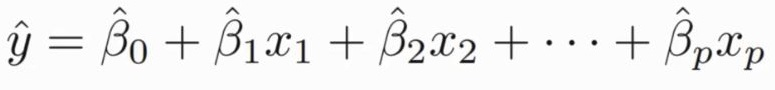



---
**Mathematics Analysis of Riddge Regression**

**Note: i is row**

These Beta coefficients were solved by minimizing the residual sum of squares (RSS):

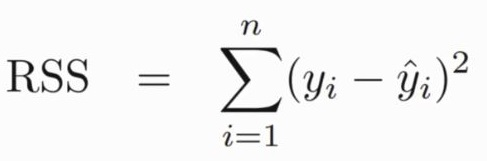


We could substitute our regression equation for y_hat:

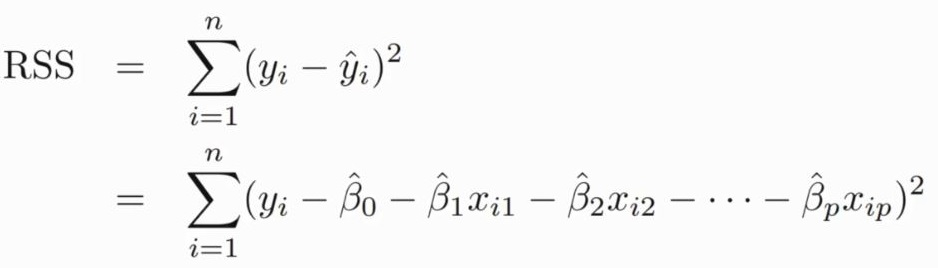


**Note : i is row, j is column**

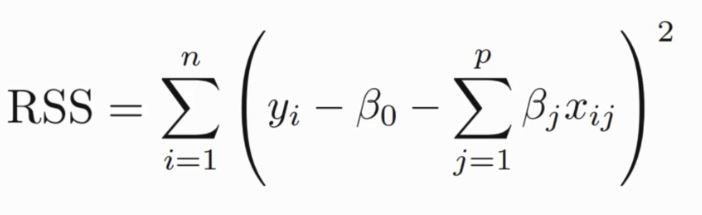


In Ridge Regression, the `cost function` is altered by adding a `penalty` equivalent to `square` of the `sum` of the `coefficients`:

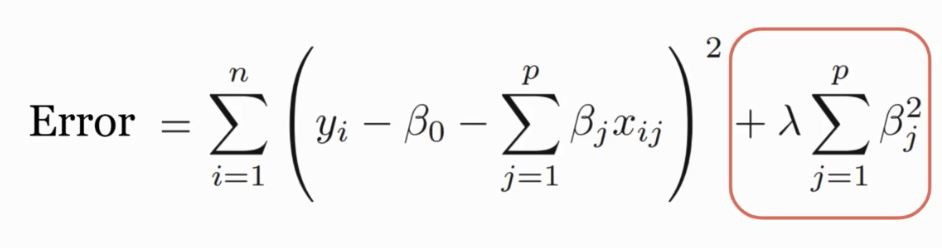

Shrinkage `Penalty` based off the `squared coefficient` (It will make large error visible because it squared the coefficient) and has `tunable` paramater `(lambda/alpha)`. In `(lambda/alpha)` theory it can be any value from 0 to infinity

---
**How Ridge Regression Works**

Ridge: In the case of an n-sphere, the points on the boundary for which some of the components of B are zero are not distinguished from the others, and the convex object in no more likely to contact a point at which some components of B are zero. So the coefficient in ridge cant be zero.

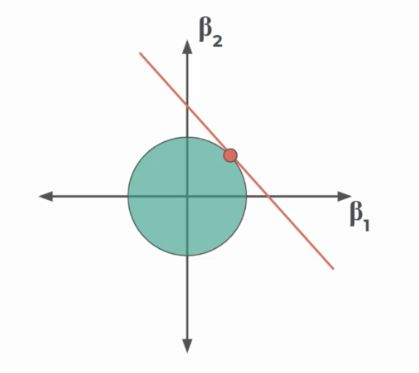

In [139]:
from sklearn.linear_model import Ridge

In [140]:
# alpha is lambda parameter
ridge_model = Ridge(alpha=10)

In [141]:
ridge_model.fit(scaled_X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

*Test Set Performance*

In [142]:
y_test_predictions = ridge_model.predict(scaled_X_test)

In [143]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [144]:
MAE = mean_absolute_error(y_test, y_test_predictions)
MAE

0.5774404204714162

In [145]:
MSE = mean_squared_error(y_test, y_test_predictions)
RMSE = np.sqrt(MSE)
RMSE

0.8946386461319651

*Train Set Performance*

How did it perform on the training set? (This will be used later on for comparison)

In [146]:
# Training Set Performance
y_train_predictions = ridge_model.predict(scaled_X_train)

In [147]:
MAE = mean_absolute_error(y_train, y_train_predictions)
MAE

0.528834818302531

In [148]:
MSE = mean_squared_error(y_train, y_train_predictions)
RMSE = np.sqrt(MSE)
RMSE

0.8491805208255246

---

### **Choosing an alpha value with Cross-Validation**

How to choose best alpha/lambda parameter?

In [149]:
from sklearn.linear_model import RidgeCV

In [150]:
# help(RidgeCV)

In [151]:
# Choosing a scoring: https://scikit-learn.org/stable/modules/model_evaluation.html
# See all options: sklearn.metrics.SCORERS.keys()

# MAE follow "Lower is better"
# Negative MAE so all metrics follow convention "Higher is better"
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
#ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0))

In [152]:
# The more alpha options you pass, the longer this will take.
# Fortunately our data set is still pretty small
ridge_cv_model.fit(scaled_X_train, y_train) # fit data to training set and validation set

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring='neg_mean_absolute_error',
        store_cv_values=False)

In [153]:
ridge_cv_model.alpha_

0.1

In [154]:
# check different scorers metrics
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

---

#### *Test Set CV Performance (Hold-out data)*

In [155]:
y_test_predictions = ridge_cv_model.predict(scaled_X_test)

In [156]:
MAE = mean_absolute_error(y_test,y_test_predictions)
MAE

0.4273774884345439

In [157]:
MSE = mean_squared_error(y_test,y_test_predictions)
RMSE = np.sqrt(MSE)
RMSE

0.6180719926946001

---

#### *Train Set CV Performance (Training and Validation)*

In [158]:
# Training Set Performance
y_train_predictions = ridge_cv_model.predict(scaled_X_train)

In [159]:
MAE = mean_absolute_error(y_train,y_train_predictions)
MAE

0.30941321056483123

In [160]:
MSE = mean_squared_error(y_train,y_train_predictions)
RMSE = np.sqrt(MSE)
RMSE

0.4698921016557383

In [161]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

---

## **C. Lasso Regression (L1)**

LASSO means Least Absolute Shrinkage and Selection Operator.

Lasso Regression adds a penalty equal to the `absolute value` of the `sum` of `coefficients`.
* Limits the size of the coefficients
* Can `yield` sparse models where `some coefficients` can become `zero`

---
**Mathematics Function (Error) of Lasso Regression**

Error:

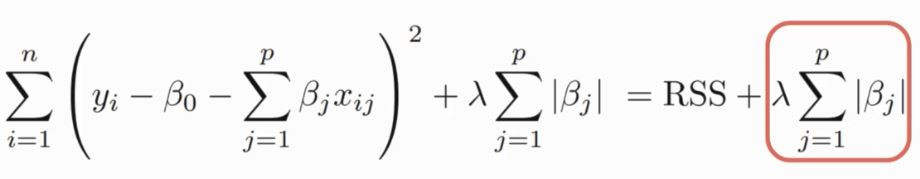

Lasso can force some of the coefficient estimates to be exactly equal to zero when the tuning parameter is sufficiently large.

Similar to subset selection, the Lasso performs variable selection

Models generated from the Lasso are generally much easier to interpret

---
**How Lasso Regression Works**

Lasso: a convex object that lies tangent to the boundary, is likely to encounter a corner of hypercube, for which some component of B are zero

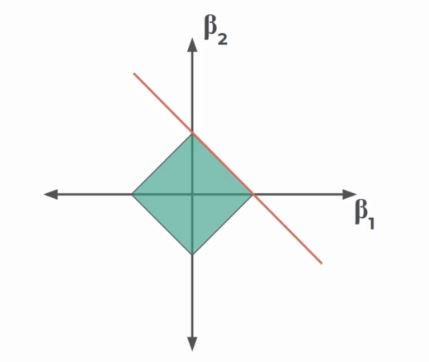

In [162]:
from sklearn.linear_model import LassoCV

In [163]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

# eps = length of the path (ratio of alpha_min/alpha_max), n_alphas = number of alphas
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, max_iter=10000, cv=5) # if the eps is small, you may need to increase max_iter to find the alpha value or just increase the eps

In [164]:
lasso_cv_model.fit(scaled_X_train, y_train) # fit data to training set and validation set

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [165]:
lasso_cv_model.alpha_

0.004943070909225833

In [166]:
# It only considering some features (ridge considering all features)
# but it more easier to interpret, it is up to you if this model is more worth (in financial) than ridge or not
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

The meaning of zero coef is the feature has no impact to the model

---

#### *Test Set CV Performance (Hold-out data)*

In [167]:
y_test_predictions = lasso_cv_model.predict(scaled_X_test)

In [168]:
MAE = mean_absolute_error(y_test, y_test_predictions)
MAE

0.4335034618590078

In [169]:
MSE = mean_squared_error(y_test, y_test_predictions)
RMSE = np.sqrt(MSE)
RMSE

0.6063140748984043

----

#### *Train Set CV Performance (Training and Validation)*

In [170]:
y_train_predictions = lasso_cv_model.predict(scaled_X_train)

In [171]:
MAE = mean_absolute_error(y_train,y_train_predictions)
MAE

0.3307056225674498

In [172]:
MSE = mean_squared_error(y_train,y_train_predictions)
RMSE = np.sqrt(MSE)
RMSE

0.515369647633577

---

## **D. Elastic Net**

Elastic Net combines the penalties of ridge regression and lasso with the addition of an alpha parameter deciding the ratio between them

---
**Mathematics Analysis of Elastic Net**

We can rewrite Lasso and Ridge:

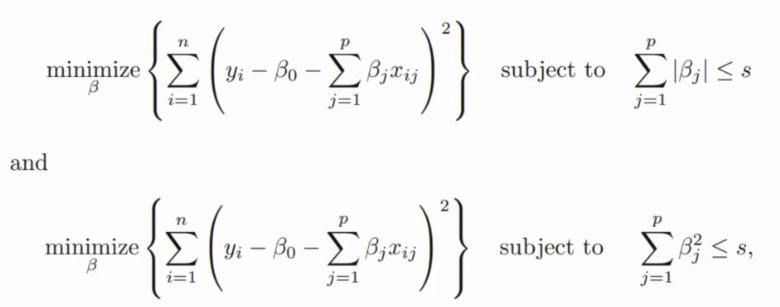

There is some sum s which allows to rewrite the penalty as requirement


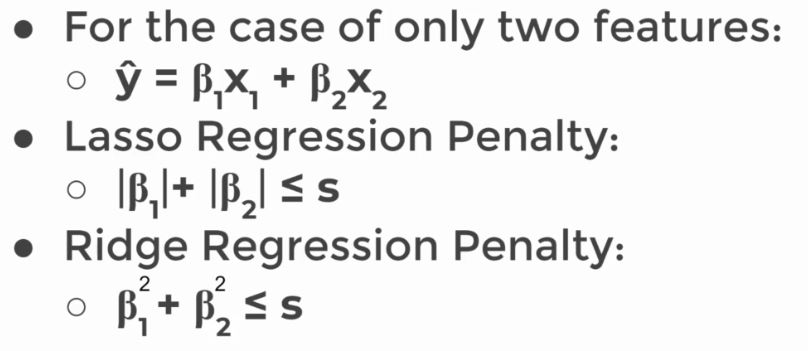


Elastic net seeks to improve on both L1 and L2 Regularization by combining them:

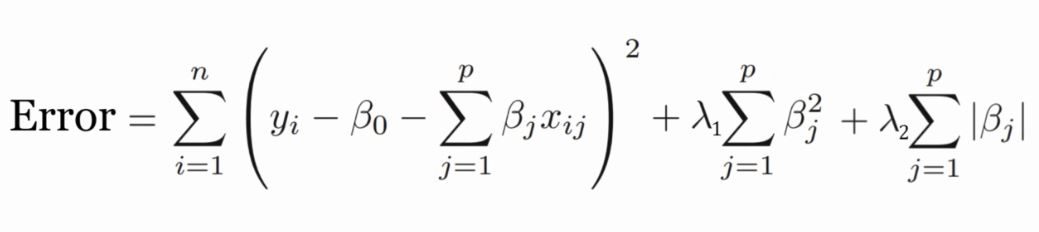


We can alternatively express this as a ratio between L1 and L2:

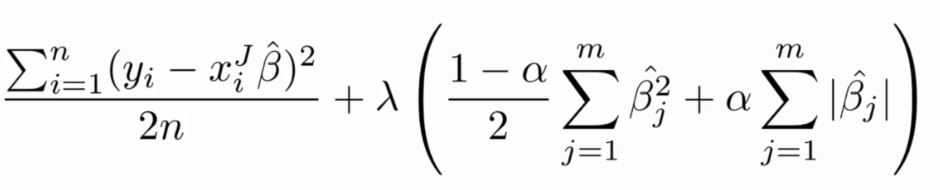

---
**How Elastic Net Works**

Elastic Net Penalty Region:

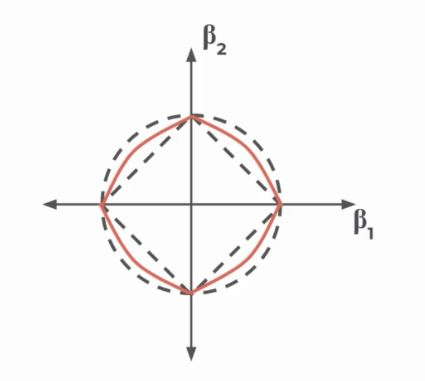

In [173]:
from sklearn.linear_model import ElasticNetCV

In [174]:
# Note that a good choice of list of values for l1_ratio is often to put more values close to 1
# (i.e. Lasso) and less close to 0 (i.e. Ridge)
# l1_ratio is lambda and alpha is ratio between L1 and L2
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=10000)

In [175]:
elastic_model.fit(scaled_X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [176]:
elastic_model.l1_ratio_

1.0

So the model runs toward lasso

In [177]:
elastic_model.alpha_

0.004943070909225833

In [178]:
elastic_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

The meaning of zero coef is the feature has no impact to the model

---

#### *Test Set CV Performance (Hold-out data)*

In [179]:
y_test_predictions = elastic_model.predict(scaled_X_test)

In [180]:
MAE = mean_absolute_error(y_test,y_test_predictions)
MAE

0.4335034618590078

In [181]:
MSE = mean_squared_error(y_test,y_test_predictions)
RMSE = np.sqrt(MSE)
RMSE

0.6063140748984043

Because it runs toward lasso, then the RMSE is same as Lasso Regression we doing above

---

#### *Train Set CV Performance (Training and Validation)*

In [182]:
y_train_predictions = elastic_model.predict(scaled_X_train)

In [183]:
MAE = mean_absolute_error(y_train, y_train_predictions)
MAE

0.3307056225674498

In [184]:
MSE = mean_squared_error(y_train, y_train_predictions)
RMSE = np.sqrt(MSE)
RMSE

0.515369647633577

-----
---